In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
clv=pd.read_csv('/content/sales_and_customer_insights.csv')
clv

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST_BIH0QW,PROD_AAPCHD,TRANS_EP2EGL,15,162.51,Clothing,72,Europe,0.84,1154.61,2022-03-04,2023-02-10,Winter,Evening,Loyalty Program
9996,CUST_DWJAD2,PROD_XWJQE5,TRANS_X7OPB7,18,63.02,Clothing,68,Europe,0.03,593.22,2021-08-21,2023-02-06,Spring,Morning,Loyalty Program
9997,CUST_43HBYL,PROD_PL3BU5,TRANS_VSZM3Y,15,116.80,Home,72,Asia,0.61,4676.35,2020-09-13,2023-05-05,Spring,Evening,Discount
9998,CUST_0SX4MD,PROD_X5O49V,TRANS_B2YCHY,12,144.21,Electronics,38,North America,0.05,6850.85,2020-01-26,2023-08-03,Summer,Morning,Discount


In [ ]:
clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  object 
 1   Product_ID                10000 non-null  object 
 2   Transaction_ID            10000 non-null  object 
 3   Purchase_Frequency        10000 non-null  int64  
 4   Average_Order_Value       10000 non-null  float64
 5   Most_Frequent_Category    10000 non-null  object 
 6   Time_Between_Purchases    10000 non-null  int64  
 7   Region                    10000 non-null  object 
 8   Churn_Probability         10000 non-null  float64
 9   Lifetime_Value            10000 non-null  float64
 10  Launch_Date               10000 non-null  object 
 11  Peak_Sales_Date           10000 non-null  object 
 12  Season                    10000 non-null  object 
 13  Preferred_Purchase_Times  10000 non-null  object 
 14  Retenti

In [ ]:
clv['Launch_Date']=pd.to_datetime(clv['Launch_Date'])
clv['Peak_Sales_Date']=pd.to_datetime(clv['Peak_Sales_Date'])

In [ ]:
clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer_ID               10000 non-null  object        
 1   Product_ID                10000 non-null  object        
 2   Transaction_ID            10000 non-null  object        
 3   Purchase_Frequency        10000 non-null  int64         
 4   Average_Order_Value       10000 non-null  float64       
 5   Most_Frequent_Category    10000 non-null  object        
 6   Time_Between_Purchases    10000 non-null  int64         
 7   Region                    10000 non-null  object        
 8   Churn_Probability         10000 non-null  float64       
 9   Lifetime_Value            10000 non-null  float64       
 10  Launch_Date               10000 non-null  datetime64[ns]
 11  Peak_Sales_Date           10000 non-null  datetime64[ns]
 12  Season             

In [ ]:
clv['Purchase_Frequency'].unique()

array([17, 10,  3, 12, 18, 16,  7,  6,  8, 13,  5, 14, 11, 19,  9,  4,  1,
        2, 15])

In [ ]:
clv['Segment']=pd.cut(clv['Purchase_Frequency'],bins=[0,8,30],labels=['occasional','regular'])

In [ ]:
clv

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy,Segment
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program,regular
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount,regular
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program,occasional
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount,regular
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST_BIH0QW,PROD_AAPCHD,TRANS_EP2EGL,15,162.51,Clothing,72,Europe,0.84,1154.61,2022-03-04,2023-02-10,Winter,Evening,Loyalty Program,regular
9996,CUST_DWJAD2,PROD_XWJQE5,TRANS_X7OPB7,18,63.02,Clothing,68,Europe,0.03,593.22,2021-08-21,2023-02-06,Spring,Morning,Loyalty Program,regular
9997,CUST_43HBYL,PROD_PL3BU5,TRANS_VSZM3Y,15,116.80,Home,72,Asia,0.61,4676.35,2020-09-13,2023-05-05,Spring,Evening,Discount,regular
9998,CUST_0SX4MD,PROD_X5O49V,TRANS_B2YCHY,12,144.21,Electronics,38,North America,0.05,6850.85,2020-01-26,2023-08-03,Summer,Morning,Discount,regular


In [ ]:
clv['Most_Frequent_Category'].unique()

array(['Electronics', 'Clothing', 'Sports', 'Home'], dtype=object)

In [ ]:
clv.rename(columns=({'Purchase_Frequency':'Purch_freq','Average_Order_Value':'Avg_ord_val','Time_Between_Purchases':'Time_b/w_purch','Most_Frequent_Category':'Products','Churn_Probability':'Churn_probab','Retention_Strategy':'Retention_strat','Lifetime_Value':'Lifetime_val','Preferred_Purchase_Times':'Prefer_purch_time'}),inplace=True)

In [ ]:
clv['Season']=clv['Season'].replace({'Fall':'Autumn'})

In [ ]:
clv['Products'].unique()

array(['Electronics', 'Clothing', 'Sports', 'Home'], dtype=object)

In [ ]:
clv.groupby('Customer_ID').count()

,Product_ID,Transaction_ID,Purch_freq,Avg_ord_val,Products,Time_b/w_purch,Region,Churn_probab,Lifetime_val,Launch_Date,Peak_Sales_Date,Season,Prefer_purch_time,Retention_strat,Segment
Customer_ID,,,,,,,,,,,,,,,
CUST_001MC1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CUST_00778J,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CUST_00JPHJ,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CUST_00MZ71,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CUST_00RV02,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUST_ZZCCI9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CUST_ZZGZFM,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CUST_ZZIFMS,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
clv['Launch_sales_gap']=clv['Launch_Date']-clv['Peak_Sales_Date']
clv['Launch_sales_gap']=-(clv['Launch_sales_gap'].dt.days)

In [ ]:
# clv['Segment']=pd.cut(clv['Purchase_Frequency'],bins=[0,8,30],labels=['occasional','regular'])
clv['Launch_sales_gap']=pd.cut(clv['Launch_sales_gap'],bins=[0,365,730,2000],labels=['short gap','medium gap','long gap'])

In [ ]:
new_order=clv.columns[[0,3,4,9,5,6,7,8,10,11,16,12,13,14,15,1]]
clv=clv[new_order]

In [ ]:
clv['Launch_sales_gap'].value_counts()

,count
Launch_sales_gap,
long gap,4997
medium gap,3324
short gap,1679


In [ ]:
clv

,Customer_ID,Purch_freq,Avg_ord_val,Lifetime_val,Products,Time_b/w_purch,Region,Churn_probab,Launch_Date,Peak_Sales_Date,Launch_sales_gap,Season,Prefer_purch_time,Retention_strat,Segment,Product_ID
0,CUST_9HOS83,17,172.57,952.81,Electronics,45,South America,0.98,2020-03-14,2023-09-11,long gap,Winter,Afternoon,Loyalty Program,regular,PROD_IK97D1
1,CUST_AJU17N,10,64.89,5427.51,Clothing,6,South America,0.66,2022-10-15,2023-01-02,short gap,Spring,Afternoon,Discount,regular,PROD_UNN7KP
2,CUST_11XNYF,3,120.38,3994.80,Sports,23,Asia,0.60,2021-11-30,2023-04-06,medium gap,Winter,Evening,Loyalty Program,occasional,PROD_0XEW2W
3,CUST_IGH8G3,12,70.34,4880.01,Clothing,5,North America,0.78,2022-03-20,2023-03-23,medium gap,Spring,Evening,Discount,regular,PROD_3IIAJN
4,CUST_OK6PUM,18,42.39,8557.70,Electronics,10,North America,0.52,2022-11-09,2023-10-28,short gap,Spring,Morning,Discount,regular,PROD_VMIWD2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST_BIH0QW,15,162.51,1154.61,Clothing,72,Europe,0.84,2022-03-04,2023-02-10,short gap,Winter,Evening,Loyalty Program,regular,PROD_AAPCHD
9996,CUST_DWJAD2,18,63.02,593.22,Clothing,68,Europe,0.03,2021-08-21,2023-02-06,medium gap,Spring,Morning,Loyalty Program,regular,PROD_XWJQE5
9997,CUST_43HBYL,15,116.80,4676.35,Home,72,Asia,0.61,2020-09-13,2023-05-05,long gap,Spring,Evening,Discount,regular,PROD_PL3BU5
9998,CUST_0SX4MD,12,144.21,6850.85,Electronics,38,North America,0.05,2020-01-26,2023-08-03,long gap,Summer,Morning,Discount,regular,PROD_X5O49V


#**ANALYSIS:-**

# Average order value for each produts

In [ ]:
clv.groupby('Products')['Avg_ord_val'].mean()

,Avg_ord_val
Products,
Clothing,110.600653
Electronics,110.008543
Home,110.543069
Sports,108.850025


# Compare the Products sales according to the weather:-

Text(0.5, 1.0, 'Products Sold')

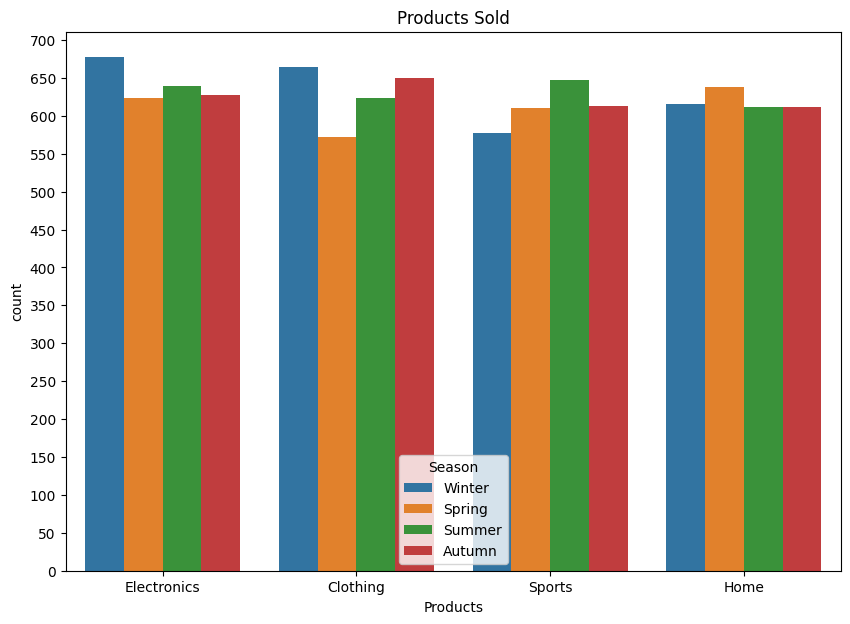

In [ ]:
plt.figure(figsize=(10,7))
plt.yticks(np.arange(0,701,50))
sns.countplot(data=clv,x='Products',hue='Season')
plt.title('Products Sold')

Observation:  During the winter time lot of electronic and clothing products were sold

1.   During winter people usually prefer to stay in home itself during their leisure time and play video games, use water heater to bath, watch tv.
2.   Due to chill weather, people use to wear multi layer clothes with sweater so clothes were sold high.
3.   During winter time some of  high cost electronics like AC,fan,air cooler won't be used much, so these demand will be less. To increase the purchase, businesses will lesser the price and people use the opporunity and buy the products in less price & keep it for their future/other climate purposes.
4.   Christmas kind of fest comes winter time only. so to gift their friends people buy electronic/clothes kind of products.



# Average order value of products in each weather:-

In [ ]:
clv.groupby(['Season','Products'])['Avg_ord_val'].mean().unstack()

Products,Clothing,Electronics,Home,Sports
Season,,,,
Autumn,110.775785,111.254713,112.489182,112.095530
Spring,108.196608,109.913997,113.109937,106.149934
Summer,111.612628,109.538169,111.554550,108.224760
Winter,111.549157,109.383545,104.950942,108.957660


1. However the number of products purchased may vary but the average order value for all the products in each climate was almost same.
2. Because acoording to the products type the cost vary.

# How Average order valueis related with Lifetime value

<Axes: xlabel='Avg_ord_val', ylabel='Lifetime_val'>

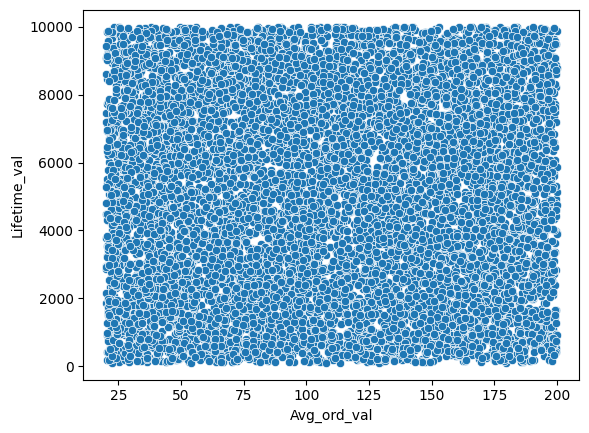

In [ ]:
sns.scatterplot(data=clv,x='Avg_ord_val',y='Lifetime_val')

1. With average order value only we can calculate Lifetime value by calculating through months or years.
2. And clusters also present So they are strongly related to each other

# Number of products bought by customers and lifetime & order value comparisons

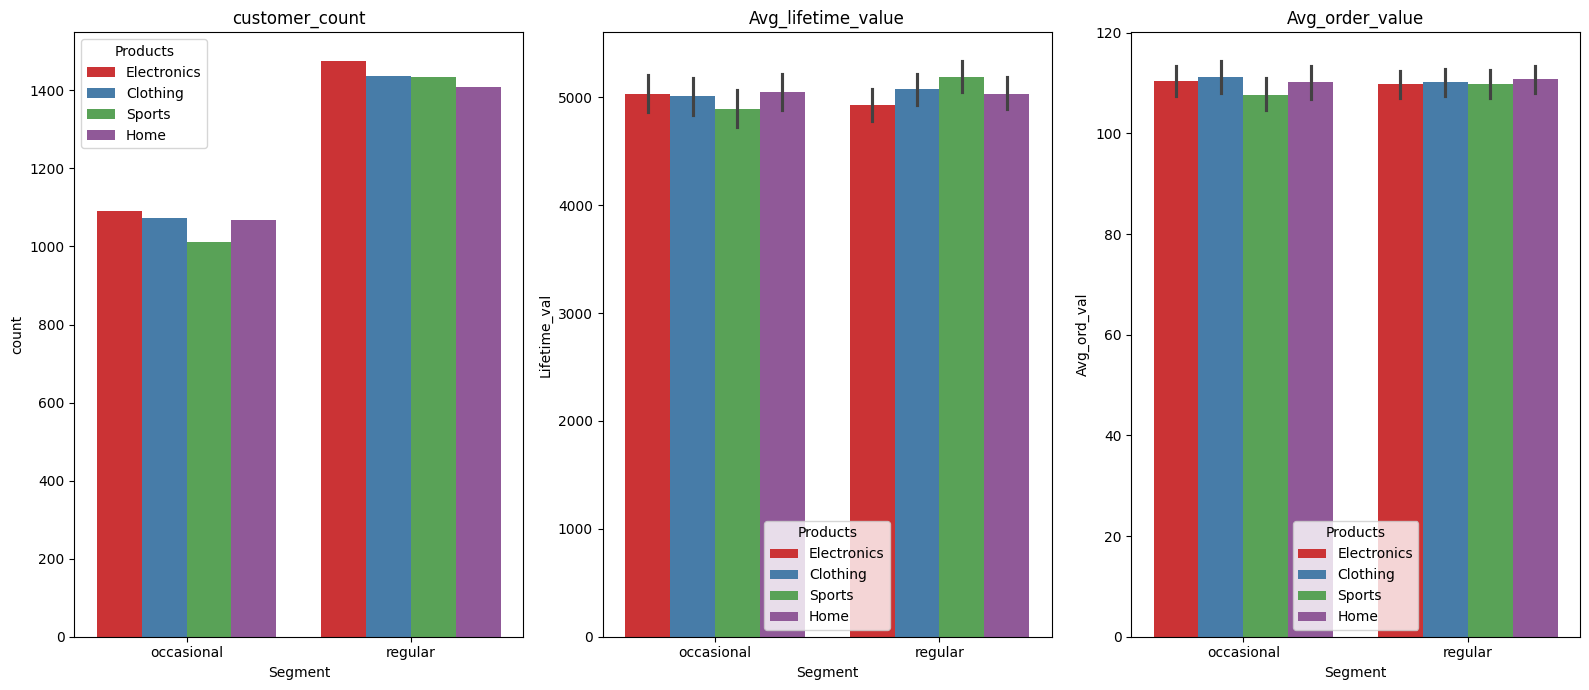

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(16,7))
sns.countplot(data=clv,x='Segment',ax=axes[0],palette='Set1',hue='Products')
axes[0].set_title('customer_count')
sns.barplot(data=clv,x='Segment',y='Lifetime_val',ax=axes[1],palette='Set1',hue='Products')
axes[1].set_title('Avg_lifetime_value')
sns.barplot(data=clv,x='Segment',y='Avg_ord_val',palette='Set1',ax=axes[2],hue='Products')
axes[2].set_title('Avg_order_value')
plt.tight_layout()

1. Eventhough regular customers count is higher than occasional customers count, average of lifetime value and order value is almost same.
2. Because regular customers might have bought less number of products or spent less money during their each visit, on otherhand occasional people might have spent high amount of for their purchase like AC,washing machine,LED TV,etc... or bought many things by spending more money in their irregular visit.

# Find how each numeric columns correlated with other column?

<Axes: >

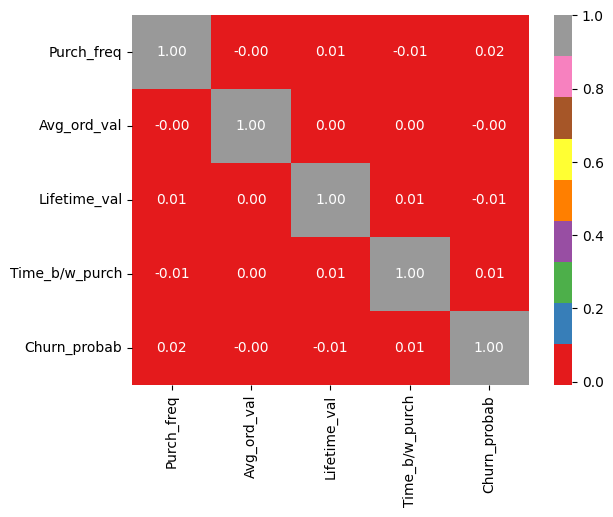

In [ ]:
d=clv[['Purch_freq','Avg_ord_val','Lifetime_val','Time_b/w_purch','Churn_probab']].corr(numeric_only=True)
sns.heatmap(d,annot=True,fmt='.2f',cmap='Set1')

In [ ]:
clv.corr(numeric_only=True)

,Purch_freq,Avg_ord_val,Lifetime_val,Time_b/w_purch,Churn_probab
Purch_freq,1.000000,-0.000072,0.007010,-0.008885,0.018417
Avg_ord_val,-0.000072,1.000000,0.004184,0.004417,-0.000871
Lifetime_val,0.007010,0.004184,1.000000,0.010418,-0.006847
Time_b/w_purch,-0.008885,0.004417,0.010418,1.000000,0.010410
Churn_probab,0.018417,-0.000871,-0.006847,0.010410,1.000000


1. Mostly all the columns don't have a strong relation with each other.
2. If any one of the column values increases/decreases it won't affect other columns that much since it all have weak relation only.

# Density of Average order value in datasets:-

<Axes: xlabel='Avg_ord_val', ylabel='Density'>

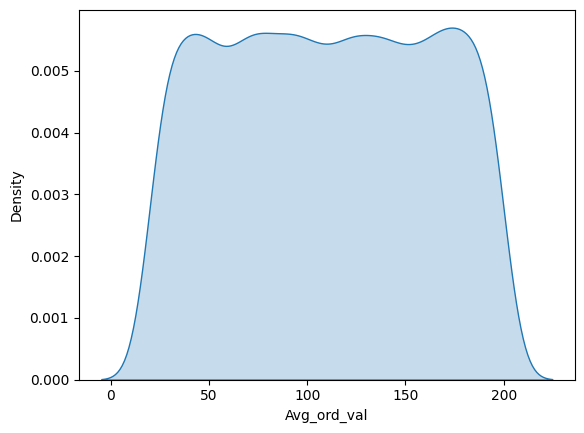

In [ ]:
sns.kdeplot(data=clv,x='Avg_ord_val',fill=True)

1. Realatively from 25-200 average order value are equally distributed then the values less than 25 and greater than 200.
2. Which mean many of the people purchased products in between range 25-200 and very less people only purchased other than this.

# Density of Launch date throughout the datasets:-

In [ ]:
clv.groupby('Launch_Date')['Product_ID'].count().idxmax()

Timestamp('2021-02-23 00:00:00')

In [ ]:
a=clv.groupby('Launch_Date')
a.get_group('2021-02-23')['Product_ID'].count()

19

In [ ]:
clv.groupby('Launch_Date')['Product_ID'].count().idxmin()

Timestamp('2020-08-07 00:00:00')

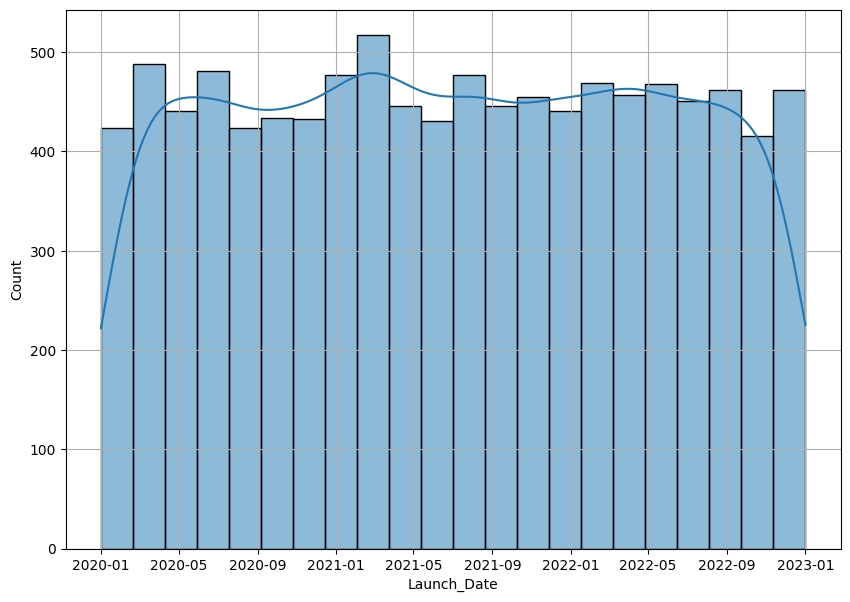

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=clv,x='Launch_Date',fill=True,kde=True)
plt.grid()

1. During 2021-01 to 2021-07 many products were launched because it was a post covid time.
2. During covid many companies faced a big disruption in their buisnesses,which leading to regain all the market shares and revenues.
3. This urged many companies to launch their new products in market post covid.
4. And also pandemic changed behaviour and preferences of people which lead companies to meet people expectations which was a hectic task for all companies.

# Density of peak sales date throughout the datasets:-

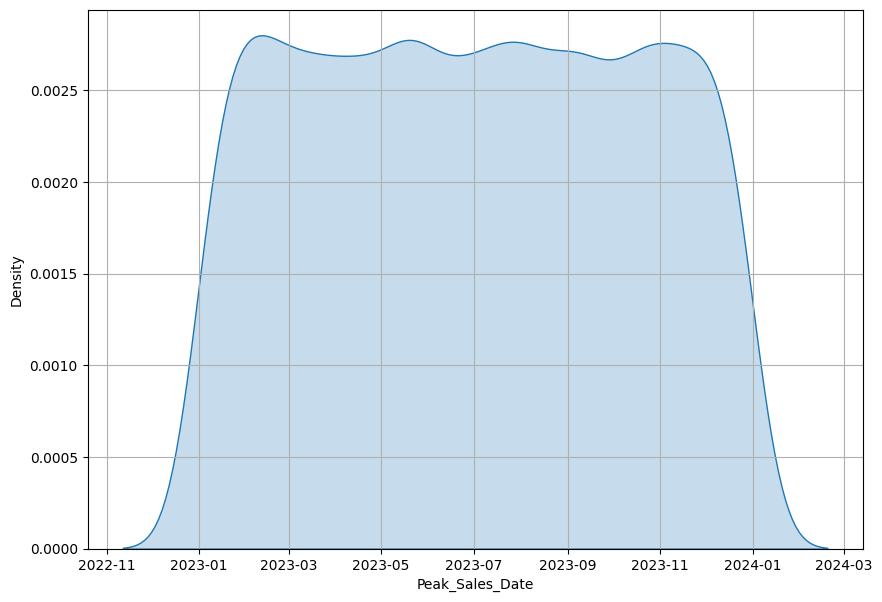

In [ ]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=clv,x='Peak_Sales_Date',fill=True)
plt.grid()

1. Pandemic period changed the behaviour and preferences of people which may lead to think in a hectic way to achieve their expectations for all companies.
2. All companies might have afraid of their previous products to launch quickly, so they might have changed lot of things in their products according to customers expectations and after they launched.
3. And all the products would have started to ramp up the sales among customers during initial time of 2023.

# Compare count of products sold according to Launch sales gap and products names

<Axes: xlabel='Launch_sales_gap', ylabel='count'>

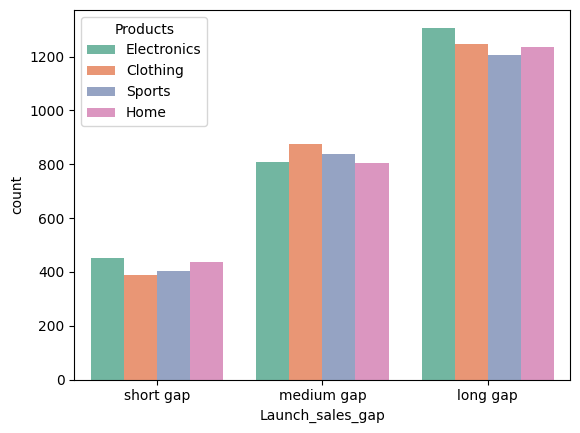

In [ ]:
sns.countplot(data=clv,x='Launch_sales_gap',hue='Products',palette='Set2')

1. Around 400,800,1200 items in each product attained their peak sales days in 365,...730,...730+... days
2. Very less number of proucts only will reach thei peak in short period. Eg:- mobiles,dresses,movie tickets,snacks etc,..
      * REASON: Promotion strategies---> Might be promoted by big celebrities with large fanbase to make their fans to buy this. This may lead to rampup the products sales.
      * People obssession to try the latest products. Eg:- Mobile...Many of mobile phones will attain its peak sales within 1 or 2 months itself.
3. Large number of products reach their peak time after 1.5 or 2 years.
      * REASON: It contains both long & short term usability products  along with high cost
      * Some of long term products are AC,washing machine, which costs high so people wont buy immediately after launching.
      * They need to hear reviews,save enough money to buy,so it take more time and also these all infrequent buying products only, because they will use more than 10 or 15 years.


# Average order values of products acording to their launch sales gap:-

<ipython-input-186-e098cf05f51c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clv,x='Launch_sales_gap',y='Avg_ord_val',palette=['purple'],legend=False)
<ipython-input-186-e098cf05f51c>:2: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=clv,x='Launch_sales_gap',y='Avg_ord_val',palette=['purple'],legend=False)


<Axes: xlabel='Launch_sales_gap', ylabel='Avg_ord_val'>

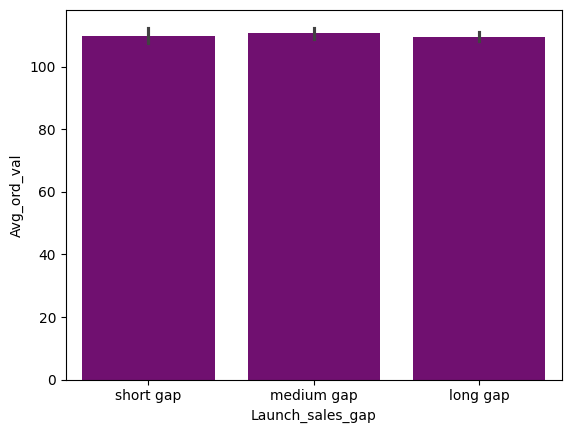

In [ ]:
# sns.countplot(data=clv,x='Launch_sales_gap',hue='Region',palette='Set2')
sns.barplot(data=clv,x='Launch_sales_gap',y='Avg_ord_val',palette=['purple'],legend=False)

1. Even though the number of products attained their peak sales varies, the average order value per customer for each launch sales gap is similar.
   
    *REASON: short time usable things cost less count more but long term usable products cost high but count less.

#Plotting of Average order value for each purchase frequency

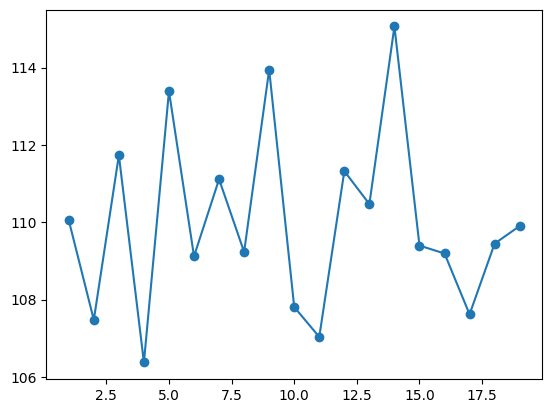

In [ ]:
group_data=clv.groupby('Purch_freq')['Avg_ord_val'].mean().reset_index()
x=group_data['Purch_freq']
y=group_data['Avg_ord_val']
plt.plot(x,y,marker='o',)

1. People who purchsed 2-4  times and 10-11 times had a lower average order value.
2. Who bought 13-14 and 8-10 had higher average value.

# Products sales according to launch sales gap

<Axes: xlabel='Launch_sales_gap', ylabel='count'>

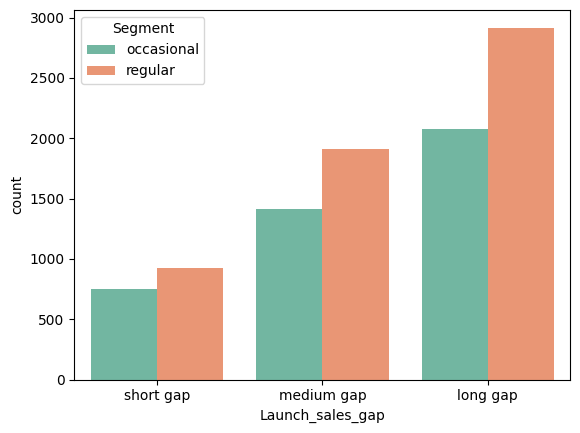

In [ ]:
sns.countplot(data=clv,x='Launch_sales_gap',hue='Segment',palette='Set2')

1. Regular customers might have been following their regular purchasing companies. That's why they buy large number of products in every peak sales time

# Express your POV on churn probability with retention strategy & purchase frequeency:-

<Axes: xlabel='Purch_freq', ylabel='Churn_probab'>

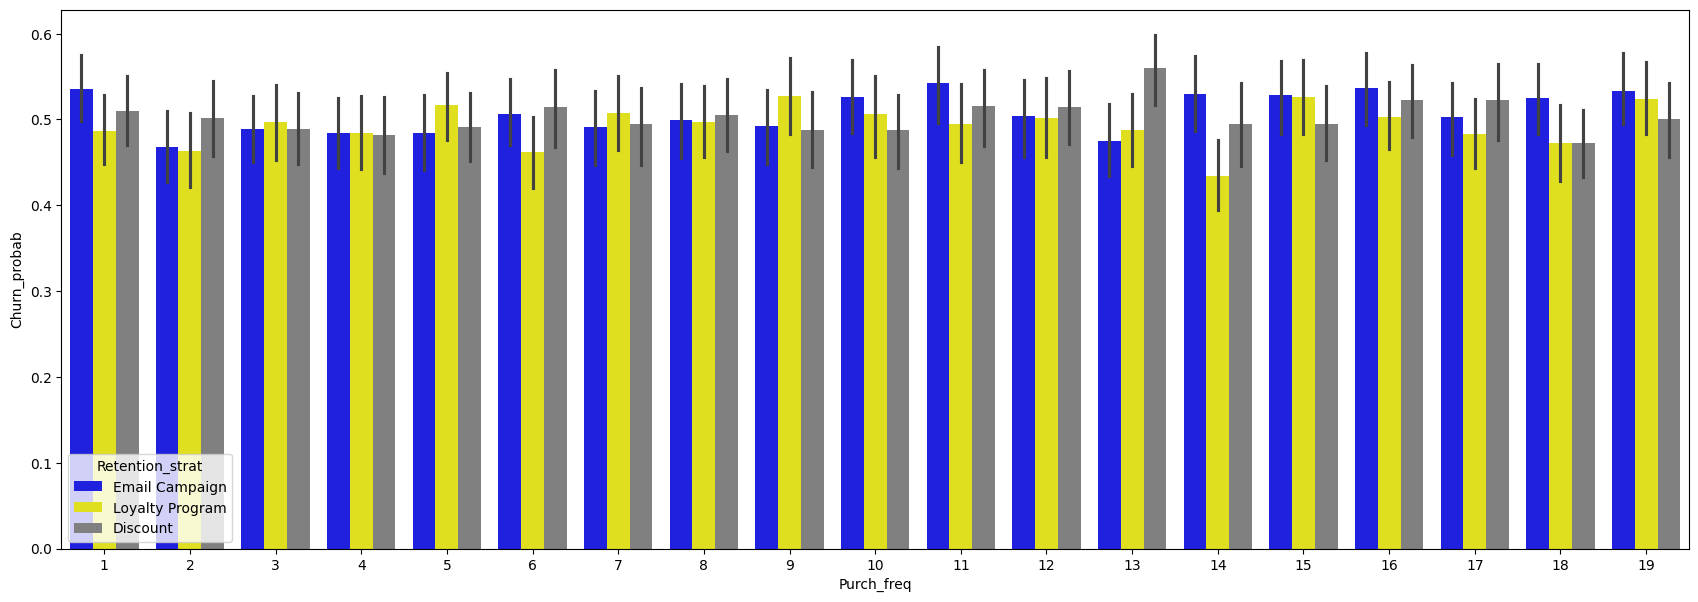

In [ ]:
plt.figure(figsize=(21,7))
sns.barplot(data=clv,x='Purch_freq',y='Churn_probab',hue='Retention_strat',palette=['blue','yellow','grey'])

   *Apart from product qualities people expect benefits
1. In above we can clearly see many of customers who receive email campaign, their churn probability is high which mean they are not happy with their benefits other than their products.
2. Churn probability is less for people who all receive discount,and loyalty programs such as cashbacks,flat off,coins,etc,...
2. To ramp down the churn probability & engage the customers to buy more products and retain them companies should invest more on discount,loyalty programs other than email campaign.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

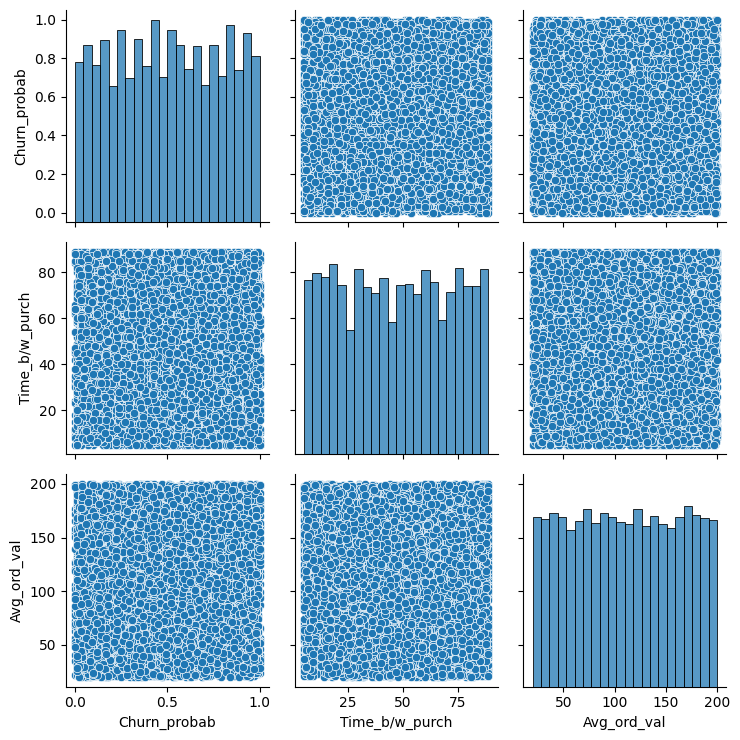

In [ ]:
f=clv[['Churn_probab','Time_b/w_purch','Avg_ord_val']]
sns.pairplot(f,palette='Set1')
plt.tight_layout()

In [ ]:
clv

,Customer_ID,Purch_freq,Avg_ord_val,Lifetime_val,Products,Time_b/w_purch,Region,Churn_probab,Launch_Date,Peak_Sales_Date,Launch_sales_gap,Season,Prefer_purch_time,Retention_strat,Segment,Product_ID
0,CUST_9HOS83,17,172.57,952.81,Electronics,45,South America,0.98,2020-03-14,2023-09-11,long gap,Winter,Afternoon,Loyalty Program,regular,PROD_IK97D1
1,CUST_AJU17N,10,64.89,5427.51,Clothing,6,South America,0.66,2022-10-15,2023-01-02,short gap,Spring,Afternoon,Discount,regular,PROD_UNN7KP
2,CUST_11XNYF,3,120.38,3994.80,Sports,23,Asia,0.60,2021-11-30,2023-04-06,medium gap,Winter,Evening,Loyalty Program,occasional,PROD_0XEW2W
3,CUST_IGH8G3,12,70.34,4880.01,Clothing,5,North America,0.78,2022-03-20,2023-03-23,medium gap,Spring,Evening,Discount,regular,PROD_3IIAJN
4,CUST_OK6PUM,18,42.39,8557.70,Electronics,10,North America,0.52,2022-11-09,2023-10-28,short gap,Spring,Morning,Discount,regular,PROD_VMIWD2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST_BIH0QW,15,162.51,1154.61,Clothing,72,Europe,0.84,2022-03-04,2023-02-10,short gap,Winter,Evening,Loyalty Program,regular,PROD_AAPCHD
9996,CUST_DWJAD2,18,63.02,593.22,Clothing,68,Europe,0.03,2021-08-21,2023-02-06,medium gap,Spring,Morning,Loyalty Program,regular,PROD_XWJQE5
9997,CUST_43HBYL,15,116.80,4676.35,Home,72,Asia,0.61,2020-09-13,2023-05-05,long gap,Spring,Evening,Discount,regular,PROD_PL3BU5
9998,CUST_0SX4MD,12,144.21,6850.85,Electronics,38,North America,0.05,2020-01-26,2023-08-03,long gap,Summer,Morning,Discount,regular,PROD_X5O49V


#Pie chart visualization of Purchase frequency:-

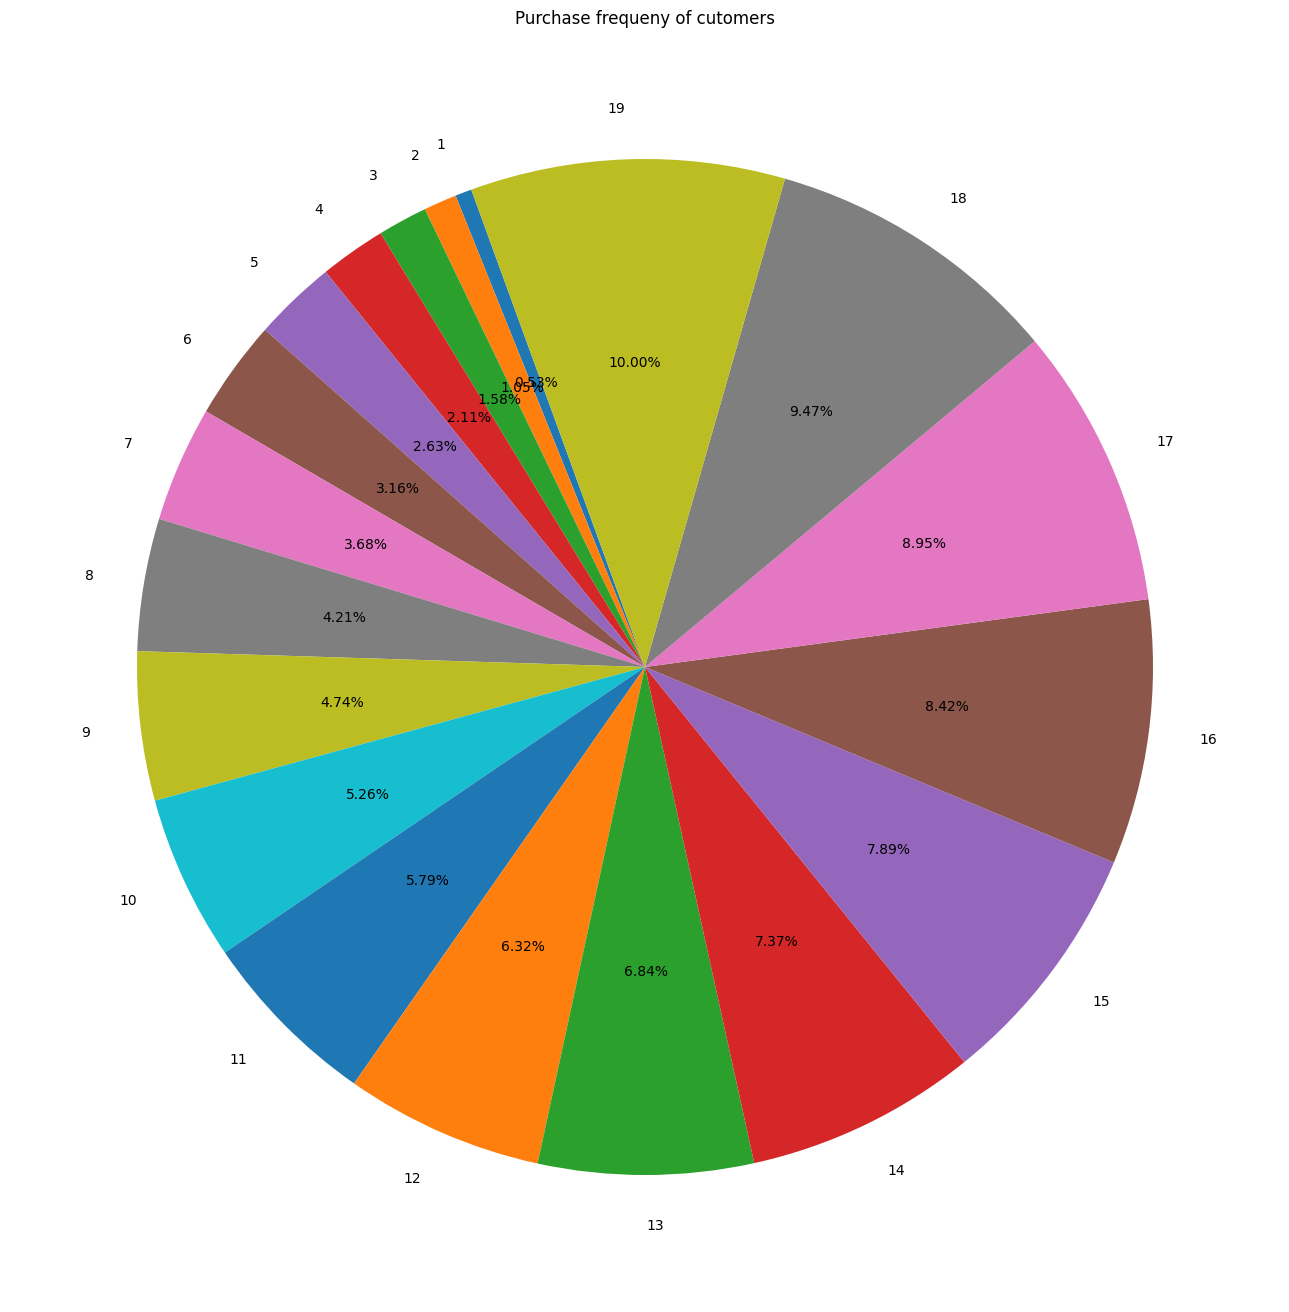

In [ ]:
d=[]
for freq in clv.groupby('Purch_freq')['Purch_freq']:
  d.append(freq[0])
plt.figure(figsize=(13,17))
plt.pie(d,startangle=110,labels=d,autopct='%.2f%%')
plt.title('Purchase frequeny of cutomers')
plt.tight_layout()

#CONCLUSION:- Niche marketing
1. Nowadays people mostly prefer quality over quantity that's y both long term & short term usable products cost is ramping up
2. While launching & selling products, companies should think about the nature of their products. Some products can be used in all region & climate, some can be used in particular region & climate. Products usage which doesn't depend on anything will be sold in more count.
3. If any people buy that kind of products companies should give more loyalty program, discount to to retain them.  
They should reduce the email campaign and increase the discount/loyalty program to ramp up the enthusiasm of customer. This will lead to lesser the churn probability (loss of customer probab)

In [ ]:
clv

,Customer_ID,Purch_freq,Avg_ord_val,Lifetime_val,Products,Time_b/w_purch,Region,Churn_probab,Launch_Date,Peak_Sales_Date,Launch_sales_gap,Season,Prefer_purch_time,Retention_strat,Segment,Product_ID
0,CUST_9HOS83,17,172.57,952.81,Electronics,45,South America,0.98,2020-03-14,2023-09-11,long gap,Winter,Afternoon,Loyalty Program,regular,PROD_IK97D1
1,CUST_AJU17N,10,64.89,5427.51,Clothing,6,South America,0.66,2022-10-15,2023-01-02,short gap,Spring,Afternoon,Discount,regular,PROD_UNN7KP
2,CUST_11XNYF,3,120.38,3994.80,Sports,23,Asia,0.60,2021-11-30,2023-04-06,medium gap,Winter,Evening,Loyalty Program,occasional,PROD_0XEW2W
3,CUST_IGH8G3,12,70.34,4880.01,Clothing,5,North America,0.78,2022-03-20,2023-03-23,medium gap,Spring,Evening,Discount,regular,PROD_3IIAJN
4,CUST_OK6PUM,18,42.39,8557.70,Electronics,10,North America,0.52,2022-11-09,2023-10-28,short gap,Spring,Morning,Discount,regular,PROD_VMIWD2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST_BIH0QW,15,162.51,1154.61,Clothing,72,Europe,0.84,2022-03-04,2023-02-10,short gap,Winter,Evening,Loyalty Program,regular,PROD_AAPCHD
9996,CUST_DWJAD2,18,63.02,593.22,Clothing,68,Europe,0.03,2021-08-21,2023-02-06,medium gap,Spring,Morning,Loyalty Program,regular,PROD_XWJQE5
9997,CUST_43HBYL,15,116.80,4676.35,Home,72,Asia,0.61,2020-09-13,2023-05-05,long gap,Spring,Evening,Discount,regular,PROD_PL3BU5
9998,CUST_0SX4MD,12,144.21,6850.85,Electronics,38,North America,0.05,2020-01-26,2023-08-03,long gap,Summer,Morning,Discount,regular,PROD_X5O49V
